In [1]:
# Install required packages
!pip install imbalanced-learn shap

# **Load Librarires**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import shap

# **Load dataset**

In [5]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)


In [6]:
data.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.columns

Index(['ID', 'Diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30'],
      dtype='object')

# **Preprocessing**

## **Drop ID colom**

In [8]:
data.drop('ID', axis=1, inplace=True)

## **Label Encodding**

In [9]:

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# **Exploratry Data Analysis**

## **Class Distribution**

/var/folders/bn/b8308xfx04g235ttkq_q6vym0000gn/T/ipykernel_93046/2757576013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data, palette='tab10')


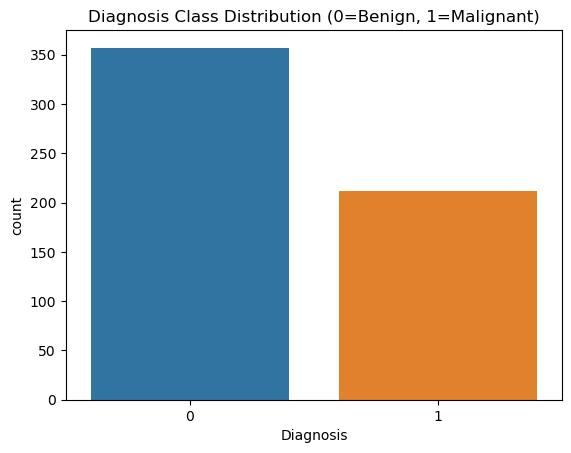

In [13]:
sns.countplot(x='Diagnosis', data=data)
plt.title("Diagnosis Class Distribution (0=Benign, 1=Malignant)")
sns.countplot(x='Diagnosis', data=data, palette='tab10')
plt.show()

## **Correlation HeatMAP**

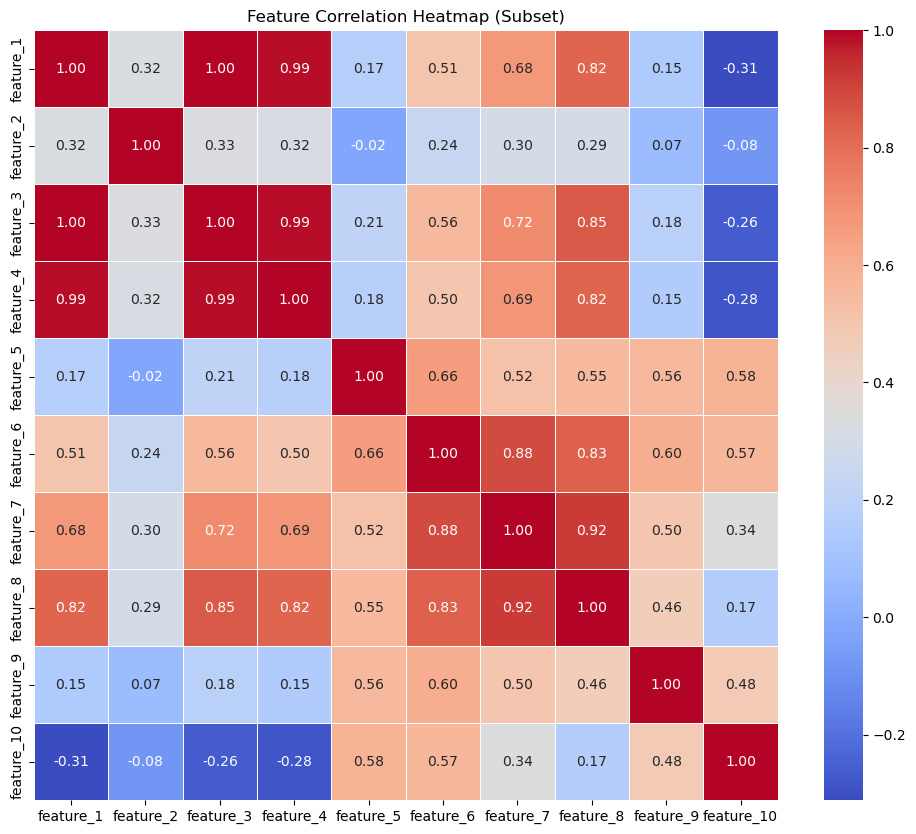

In [15]:
# Focus on a subset of features for better visualization
subset_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
plt.figure(figsize=(12, 10))
sns.heatmap(data[subset_features].corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Subset)")
plt.show()

## **Histogram**

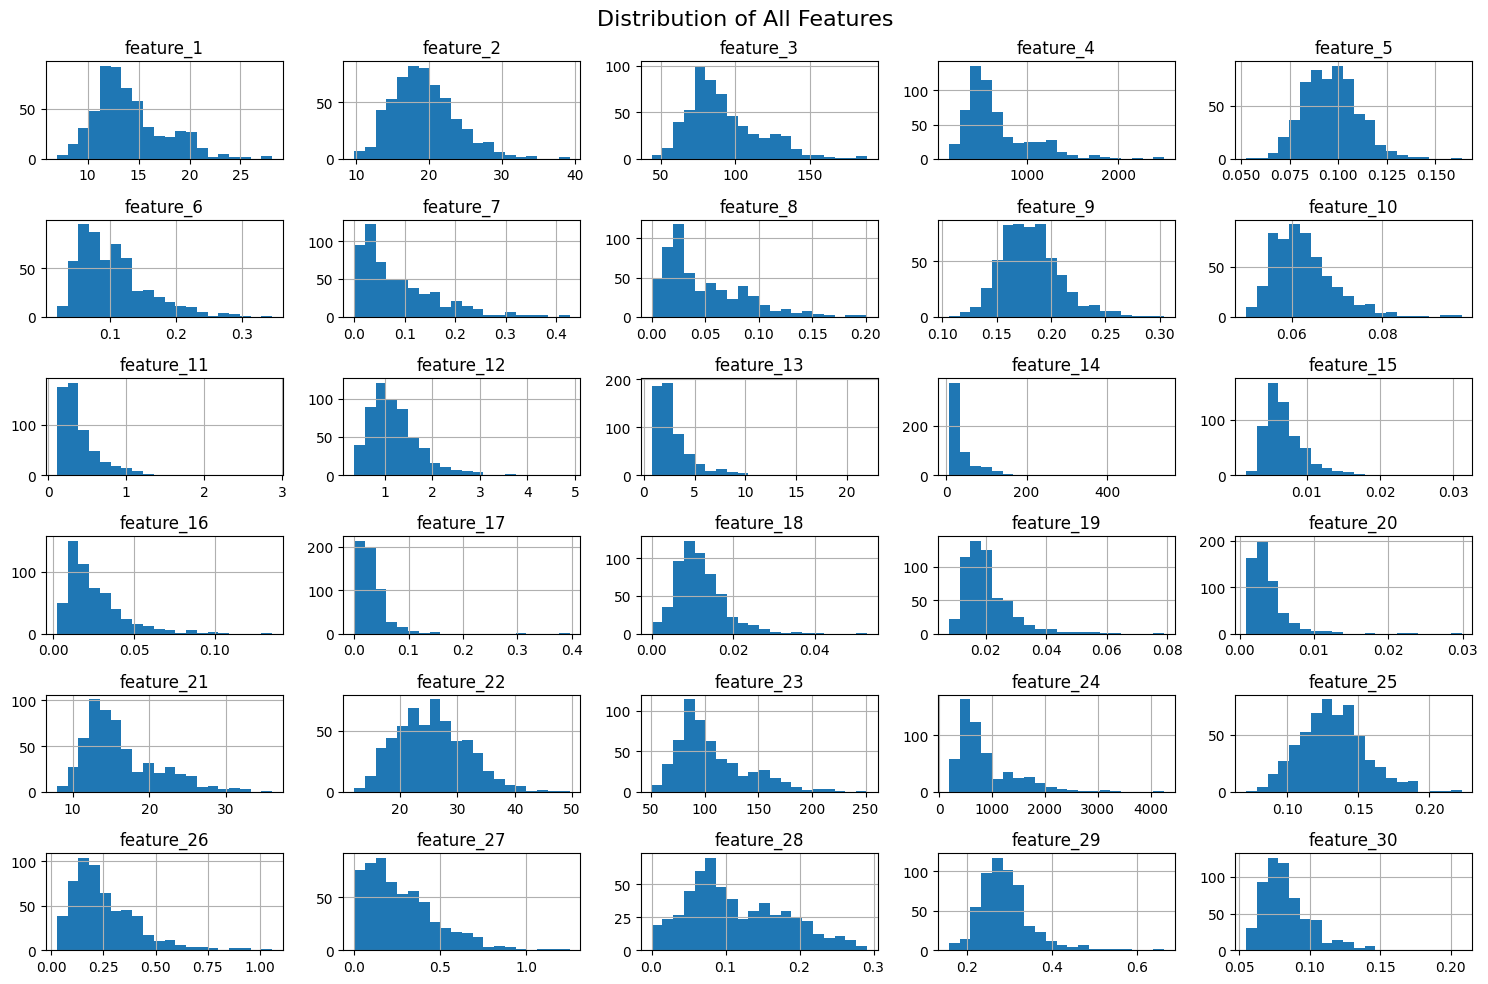

In [ ]:
# histogram

data.drop('Diagnosis', axis=1).hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of All Features", fontsize=16)
plt.tight_layout()
plt.show()

# **Standard Scale the Features**

In [ ]:
# Preprocessing
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#**Data Splitting**

In [ ]:

# Split 80 percent use fro training and 20 percent for test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



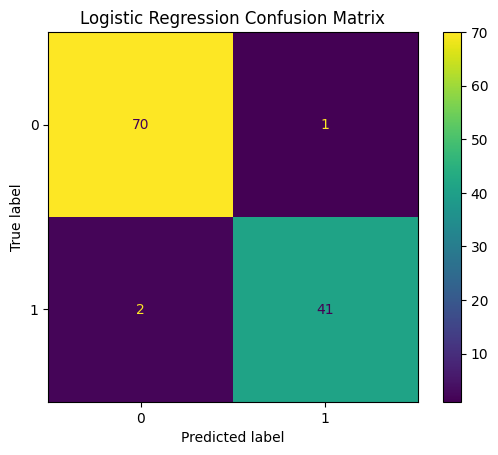


k-NN Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



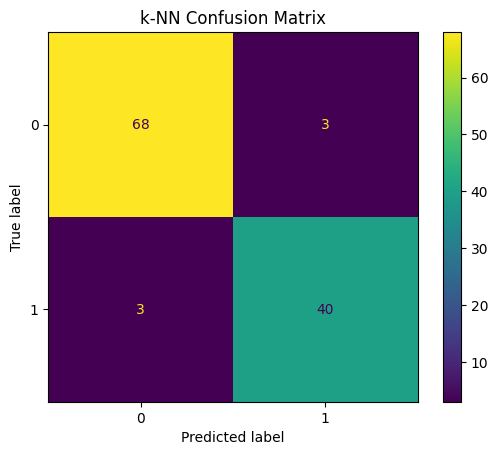


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



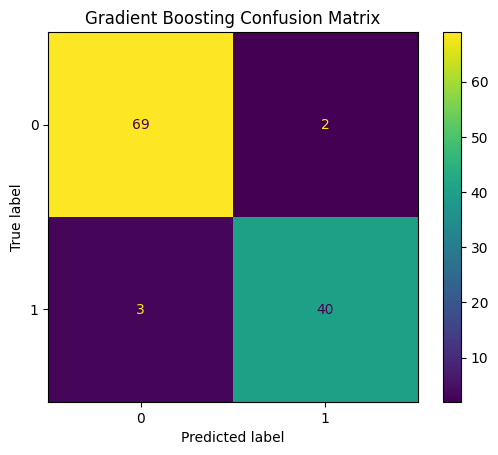

In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Report:\n", classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f'{name} Confusion Matrix')
    plt.show()

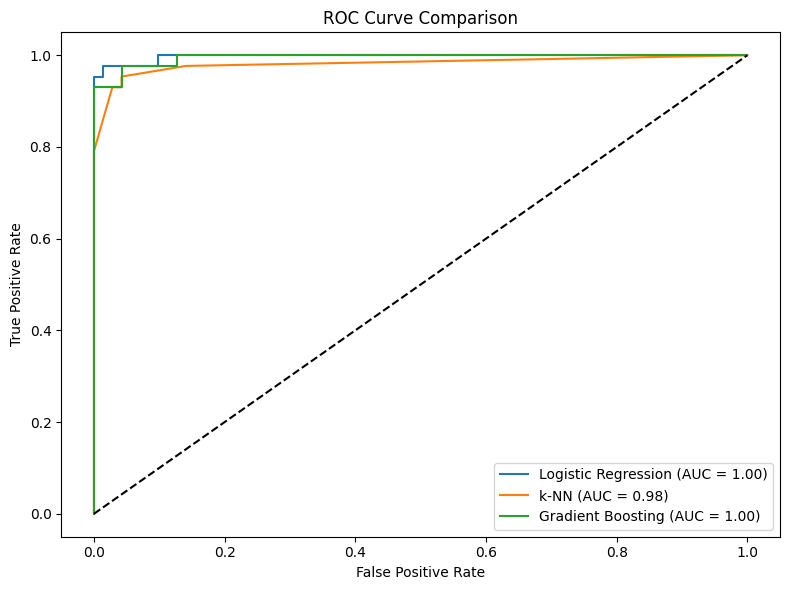

In [ ]:
# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# **Apply SMOTE**

Shape of training data after SMOTE: (572, 30)
Class distribution of training data after SMOTE:
 Diagnosis
0    286
1    286
Name: count, dtype: int64

--- Evaluation with SMOTE applied ---

Training Logistic Regression with SMOTE data...

Logistic Regression Report (SMOTE):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



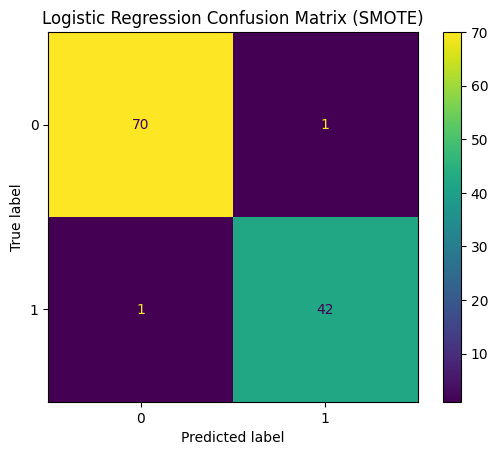


Training k-NN with SMOTE data...

k-NN Report (SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



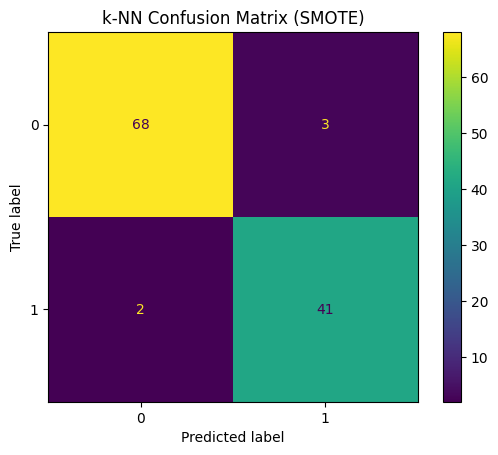


Training Gradient Boosting with SMOTE data...

Gradient Boosting Report (SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



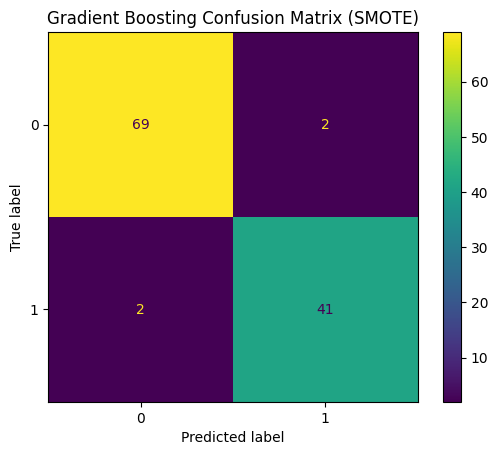

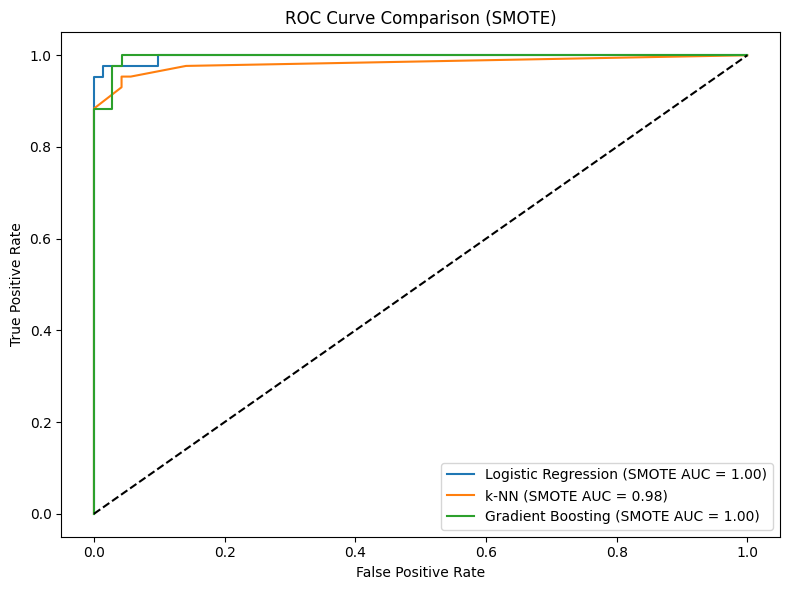

In [ ]:

import matplotlib.pyplot as plt
# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of training data after SMOTE:", X_train_smote.shape)
print("Class distribution of training data after SMOTE:\n", y_train_smote.value_counts())

# Train and evaluate models on SMOTE data
print("\n--- Evaluation with SMOTE applied ---")
for name, model in models.items():
    print(f"\nTraining {name} with SMOTE data...")
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test)
    print(f"\n{name} Report (SMOTE):\n", classification_report(y_test, y_pred_smote))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f'{name} Confusion Matrix (SMOTE)')
    plt.show()

# ROC Curves for SMOTE models
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob_smote = model.predict_proba(X_test)[:, 1]
    fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
    auc_smote = roc_auc_score(y_test, y_prob_smote)
    plt.plot(fpr_smote, tpr_smote, label=f"{name} (SMOTE AUC = {auc_smote:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (SMOTE)")
plt.legend()
plt.tight_layout()
plt.show()

# **Visualize the SHAP values**

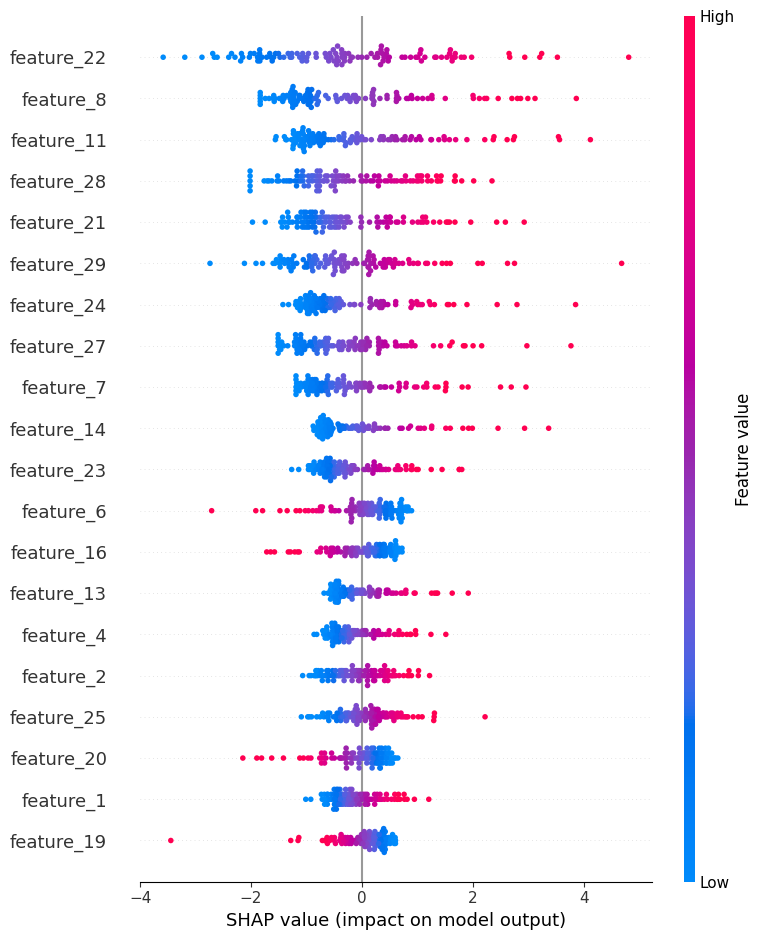

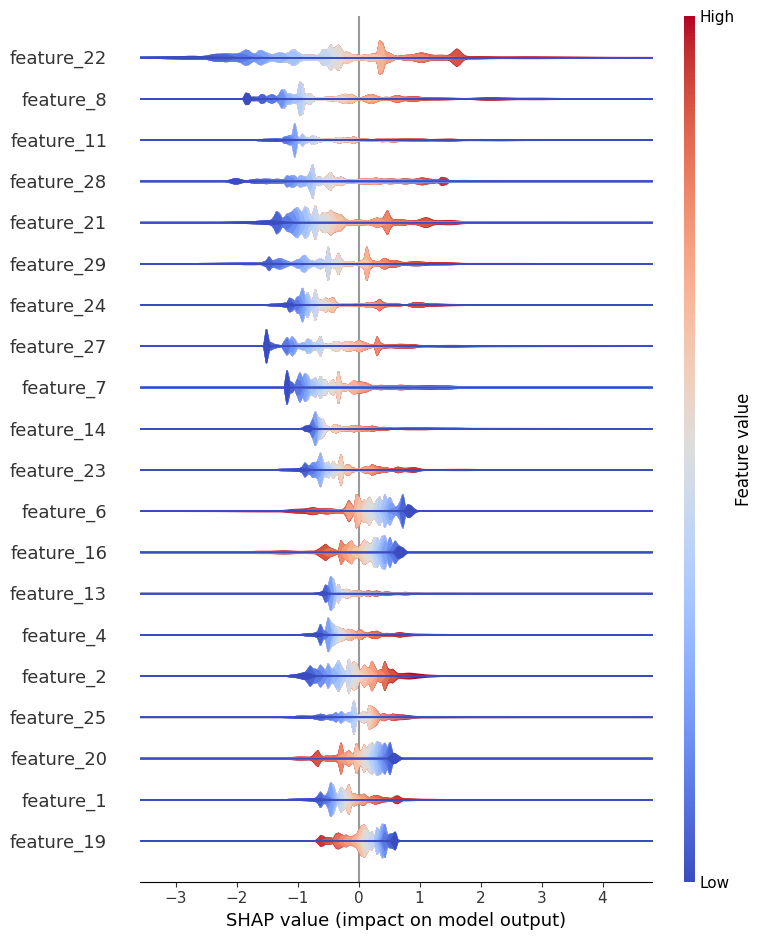

In [ ]:

# Train the Logistic Regression model for SHAP analysis
lr_model_smote = LogisticRegression(max_iter=1000)
lr_model_smote.fit(X_train_smote, y_train_smote)

# Create a SHAP explainer for the Logistic Regression model
# Using a background dataset (e.g., training data) to approximate the expectation
explainer = shap.Explainer(lr_model_smote, X_train_smote)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values
# Summary plot of SHAP values
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

# Beeswarm plot of SHAP values (shows distribution and magnitude)
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns, plot_type="layered_violin")

# # Optional: Individual explanation for a specific test sample
# sample_idx = 0 # Choose an index from the test set
# shap.plots.waterfall(shap_values[sample_idx], feature_names=X.columns)

# **DEEP Learning Model**


--- Training LSTM Model (with SMOTE) ---
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8192 - loss: 0.6211 - val_accuracy: 0.8870 - val_loss: 0.4592
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9004 - loss: 0.4682 - val_accuracy: 0.9130 - val_loss: 0.3512
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9274 - loss: 0.3741 - val_accuracy: 0.9130 - val_loss: 0.2917
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9432 - loss: 0.3034 - val_accuracy: 0.9217 - val_loss: 0.2466
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9364 - loss: 0.2643 - val_accuracy: 0.9652 - val_loss: 0.2069
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9542 - loss: 0.2032 - val_accuracy: 0.9652 - val_loss: 0.1800
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9625 - loss: 0.1812 - val_accuracy: 0.9652 - val_loss: 0.1561
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9562 - loss: 0.1527 - val_accuracy: 0.9739 - val_loss

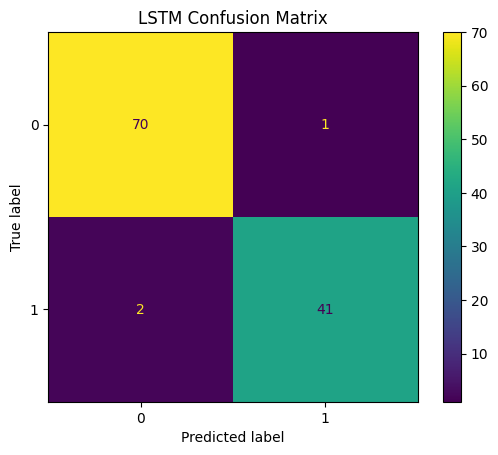


--- Evaluating GRU Model ---
GRU Test Accuracy: 0.9825
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
GRU Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



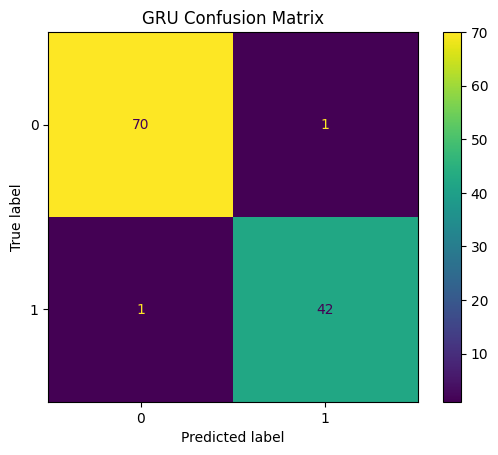

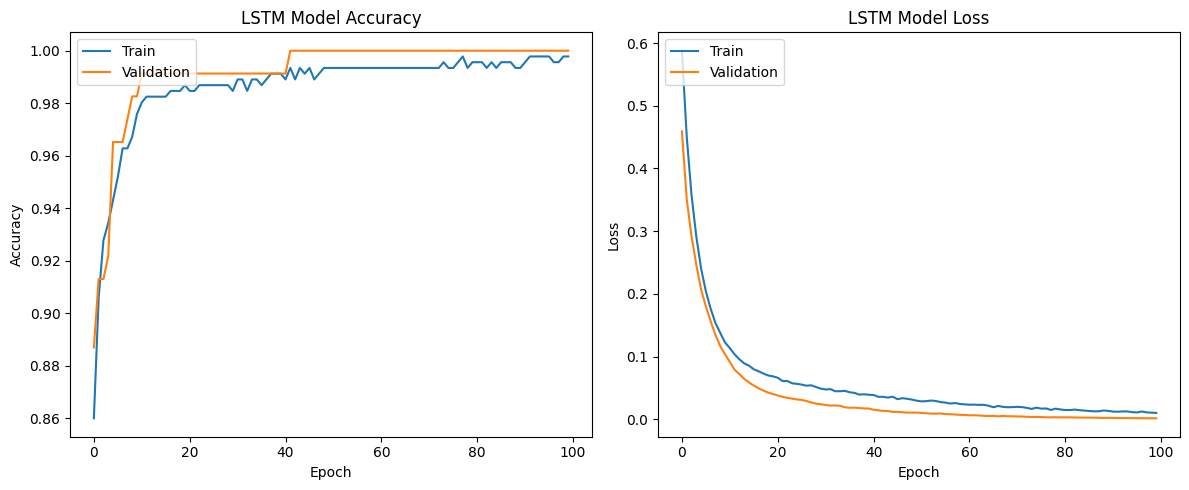

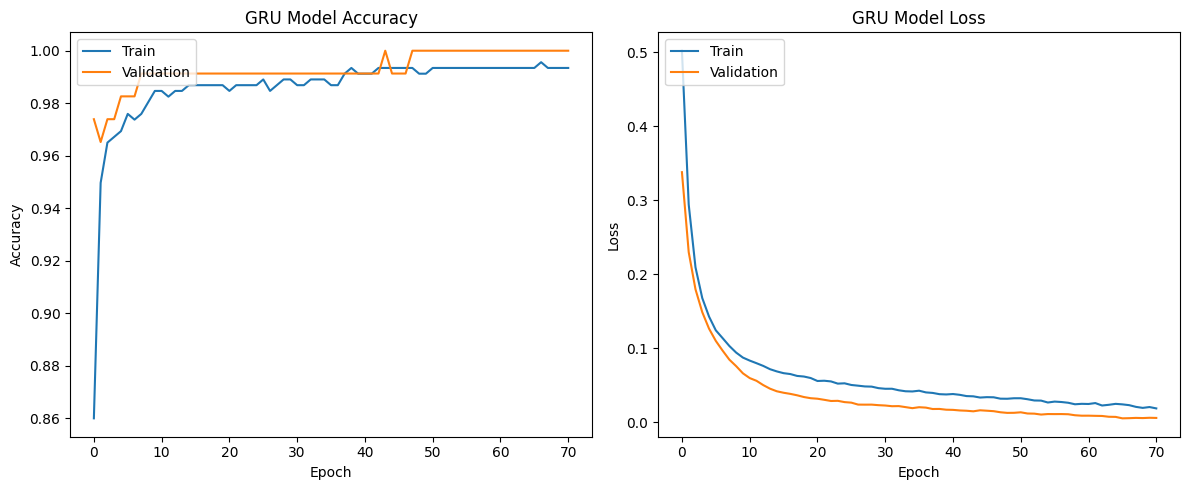

In [ ]:

import matplotlib.pyplot as plt
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data for RNNs (samples, timesteps, features)
# For this dataset, we treat each sample as a single timestep
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Reshape SMOTE data
X_train_smote_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))

# Define LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train LSTM Model (on SMOTE data)
print("\n--- Training LSTM Model (with SMOTE) ---")
lstm_history = lstm_model.fit(X_train_smote_reshaped, y_train_smote, epochs=100, batch_size=32,
                              validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Train GRU Model (on SMOTE data)
print("\n--- Training GRU Model (with SMOTE) ---")
gru_history = gru_model.fit(X_train_smote_reshaped, y_train_smote, epochs=100, batch_size=32,
                            validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate LSTM Model
print("\n--- Evaluating LSTM Model ---")
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_acc:.4f}")

y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lstm)
disp.ax_.set_title('LSTM Confusion Matrix')
plt.show()

# Evaluate GRU Model
print("\n--- Evaluating GRU Model ---")
gru_loss, gru_acc = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"GRU Test Accuracy: {gru_acc:.4f}")

y_pred_gru = (gru_model.predict(X_test_reshaped) > 0.5).astype("int32")
print("GRU Classification Report:\n", classification_report(y_test, y_pred_gru))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gru)
disp.ax_.set_title('GRU Confusion Matrix')
plt.show()

# Plot History Graphs
def plot_history(history, model_name):
  plt.figure(figsize=(12, 5))

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{model_name} Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{model_name} Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.tight_layout()
  plt.show()

plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')
